In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast 
from wordcloud import WordCloud
from collections import defaultdict, Counter
from itertools import combinations
import networkx as nx
import plotly.express as px

In [2]:
df = pd.read_csv('frontend_processed_articles.csv')

In [3]:
df.head(1)

article_hash   media_source  \
0  12f94e4f4f6e8151fe1c83dd17701c830d94154a87a19f...  New York Post   

          author                                           headline  \
0  Diana Glebova  RFK Jr. vows to appoint special counsel to loo...   

                                         description  \
0  Just what America needs: More special counsels...   

                                                 url  \
0  https://nypost.com/2024/04/05/us-news/rfk-jr-v...   

                                           image_url          publish_date  \
0  https://nypost.com/wp-content/uploads/sites/2/...  2024-04-05T20:40:29Z   

                 current_date  \
0  2024-04-06 16:45:09.852245   

                                     text_embeddings  \
0  [-0.027878182008862495, -0.02313298173248768, ...   

                                               words  \
0  ['America', 'Robert F.  Kennedy Jr', 'Donald T...   

                                              labels  \
0  ['positive', 'positive', 'negative', 'negative...   

                                              scores  recommended_hashes  
0  [0.703181266784668, 0.5689260959625244, 0.9515...  [22, 785, 55, 356]

## Sentiment Distribution per Media Source

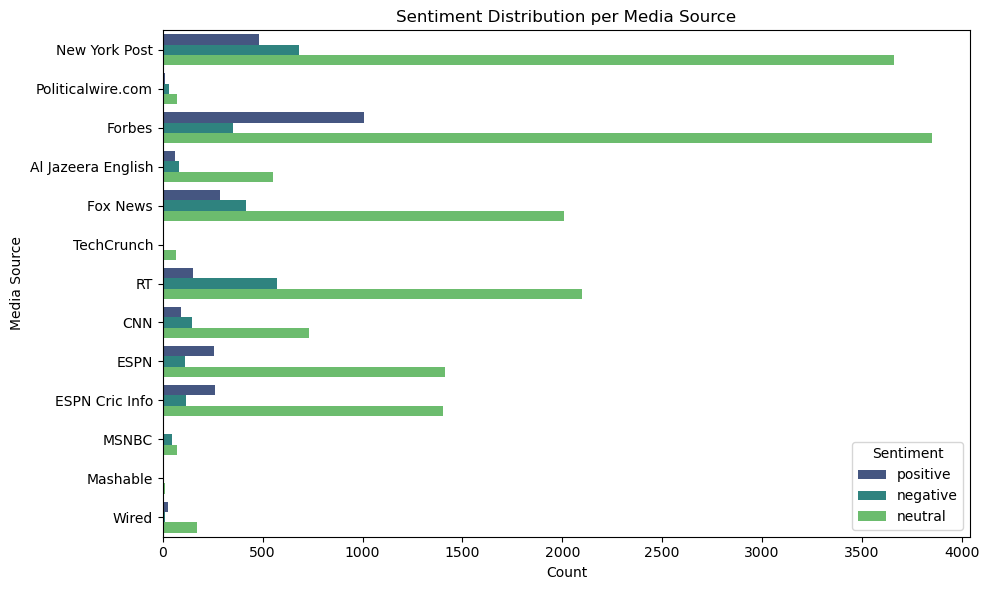

In [4]:
df['labels'] = df['labels'].apply(ast.literal_eval)
all_labels = [label for sublist in df['labels'] for label in sublist]
all_media_sources = [source for source, sublist in zip(df['media_source'], df['labels']) for label in sublist]

plot_df = pd.DataFrame({
    'Media Source': all_media_sources,
    'Sentiment': all_labels
})


plt.figure(figsize=(10, 6))
sns.countplot(y='Media Source', hue='Sentiment', data=plot_df, palette='viridis')
plt.title('Sentiment Distribution per Media Source')
plt.xlabel('Count')
plt.ylabel('Media Source')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


## Word Cloud of Keywords

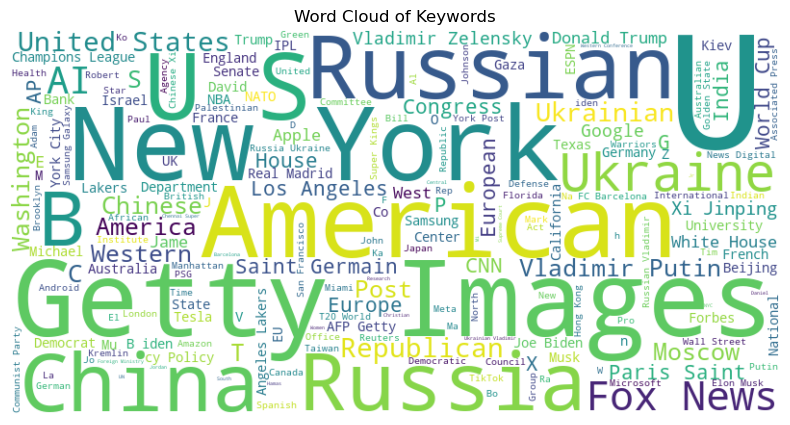

In [5]:
df['words'] = df['words'].apply(ast.literal_eval)
all_words = ' '.join([word for sublist in df['words'] for word in sublist])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Keywords')
plt.show()

## Number of Articles per Media Source

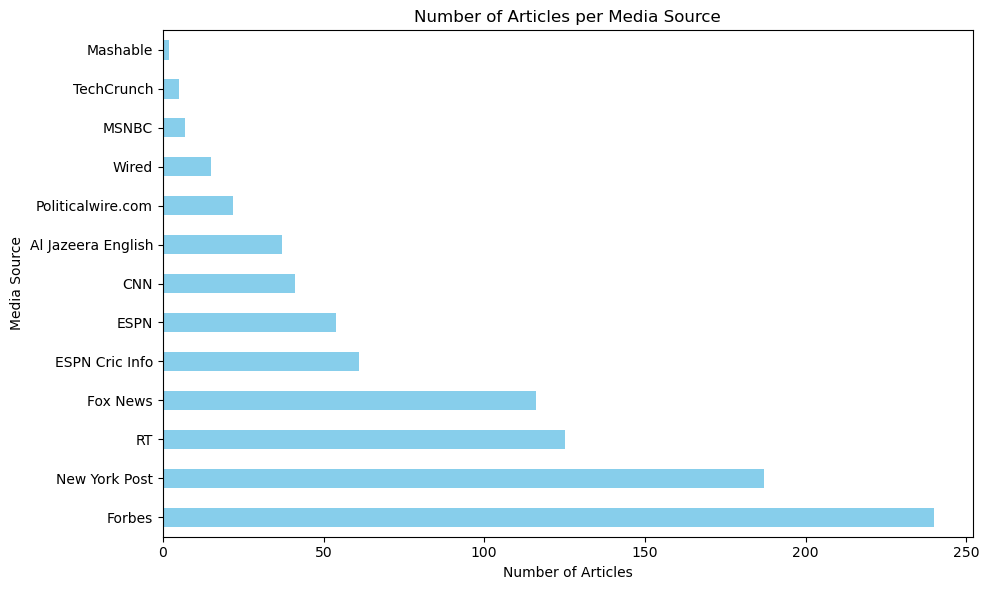

In [6]:
plt.figure(figsize=(10, 6))
df['media_source'].value_counts().plot(kind='barh', color='skyblue')
plt.xlabel('Number of Articles')
plt.ylabel('Media Source')
plt.title('Number of Articles per Media Source')
plt.tight_layout()
plt.show()

## Sentiment Scores Distribution

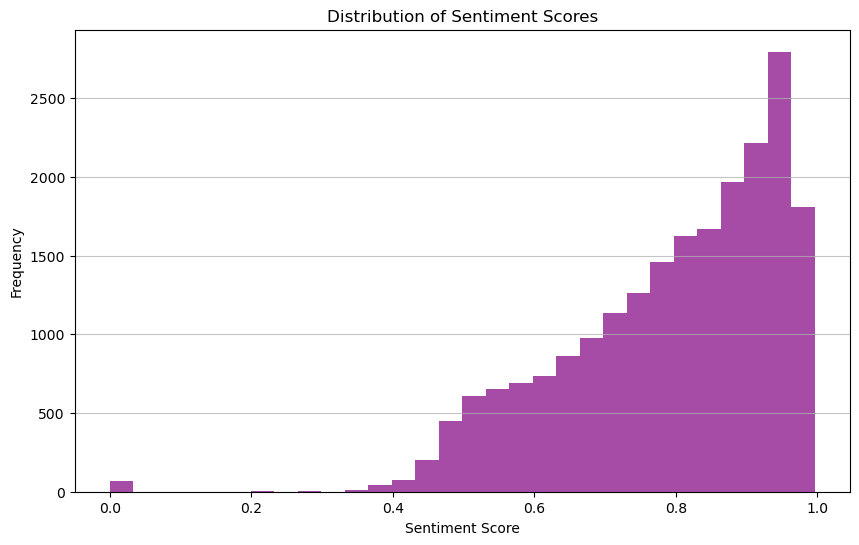

In [7]:
df['scores'] = df['scores'].apply(ast.literal_eval)
all_scores = [score for sublist in df['scores'] for score in sublist]

plt.figure(figsize=(10, 6))
plt.hist(all_scores, bins=30, color='purple', alpha=0.7)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

## Sentiment Score Average by Media Source

C:\Users\sarth\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


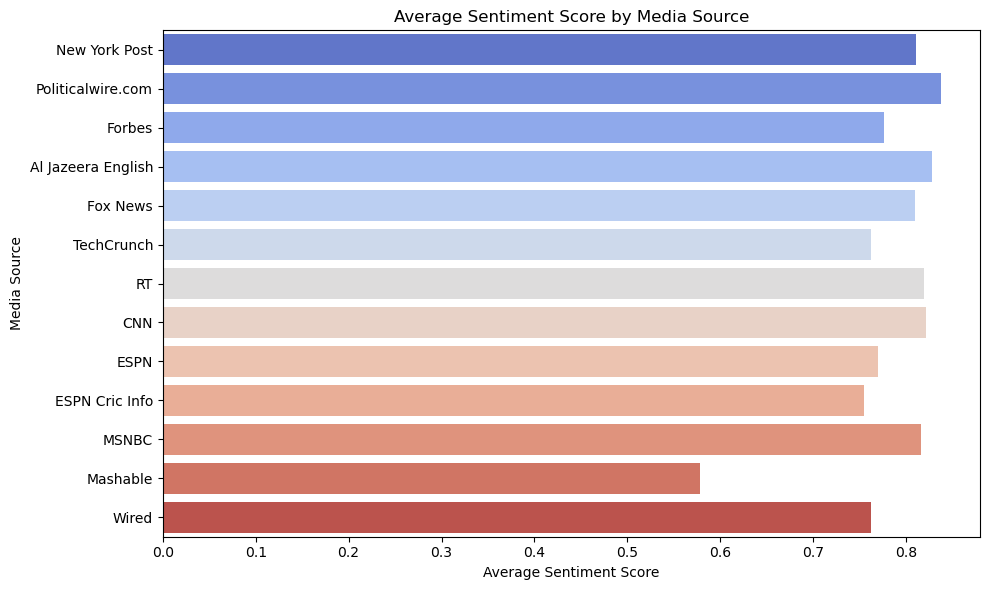

In [8]:
df['scores'] = df['scores'].apply(lambda x: [float(i) for i in x])
df['average_score'] = df['scores'].apply(np.mean)


plt.figure(figsize=(10, 6))
sns.barplot(x='average_score', y='media_source', data=df, estimator=np.mean, errorbar=None, palette='coolwarm')
plt.title('Average Sentiment Score by Media Source')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Media Source')
plt.tight_layout()
plt.show()

## Article Count by Publish Date

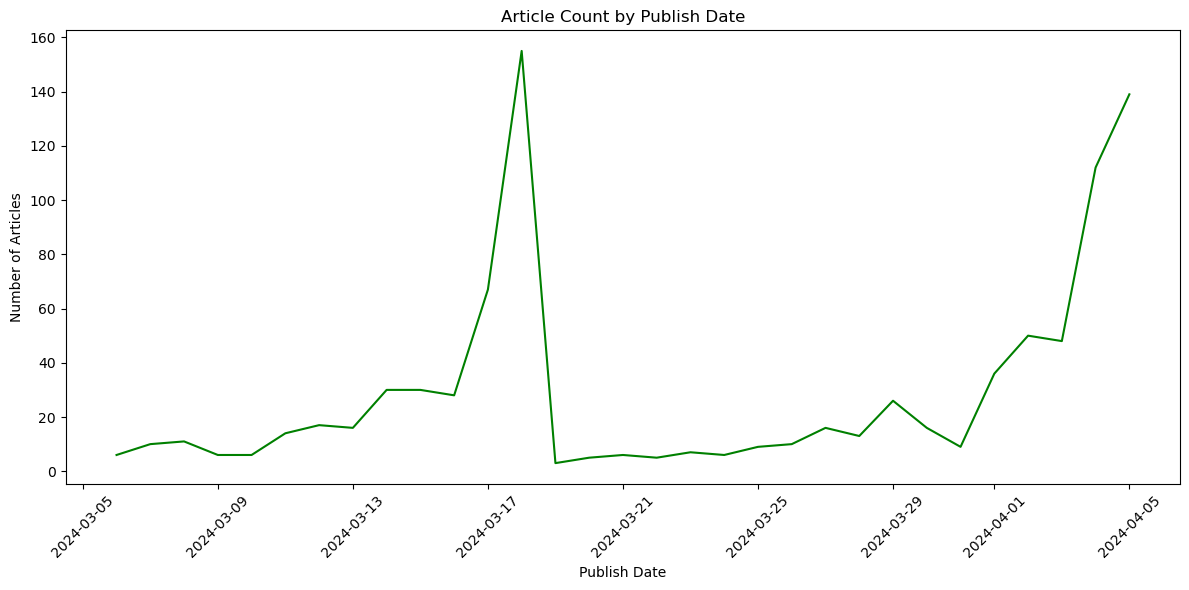

In [9]:
df['publish_date'] = pd.to_datetime(df['publish_date'])

# Extract date from datetime
df['publish_date'] = df['publish_date'].dt.date

# Count articles by date
article_counts_by_date = df.groupby('publish_date').size()

# Plot
plt.figure(figsize=(12, 6))
article_counts_by_date.plot(kind='line', color='green')
plt.title('Article Count by Publish Date')
plt.xlabel('Publish Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Heatmap of Sentiment Labels Across Media Sources and Publish Dates

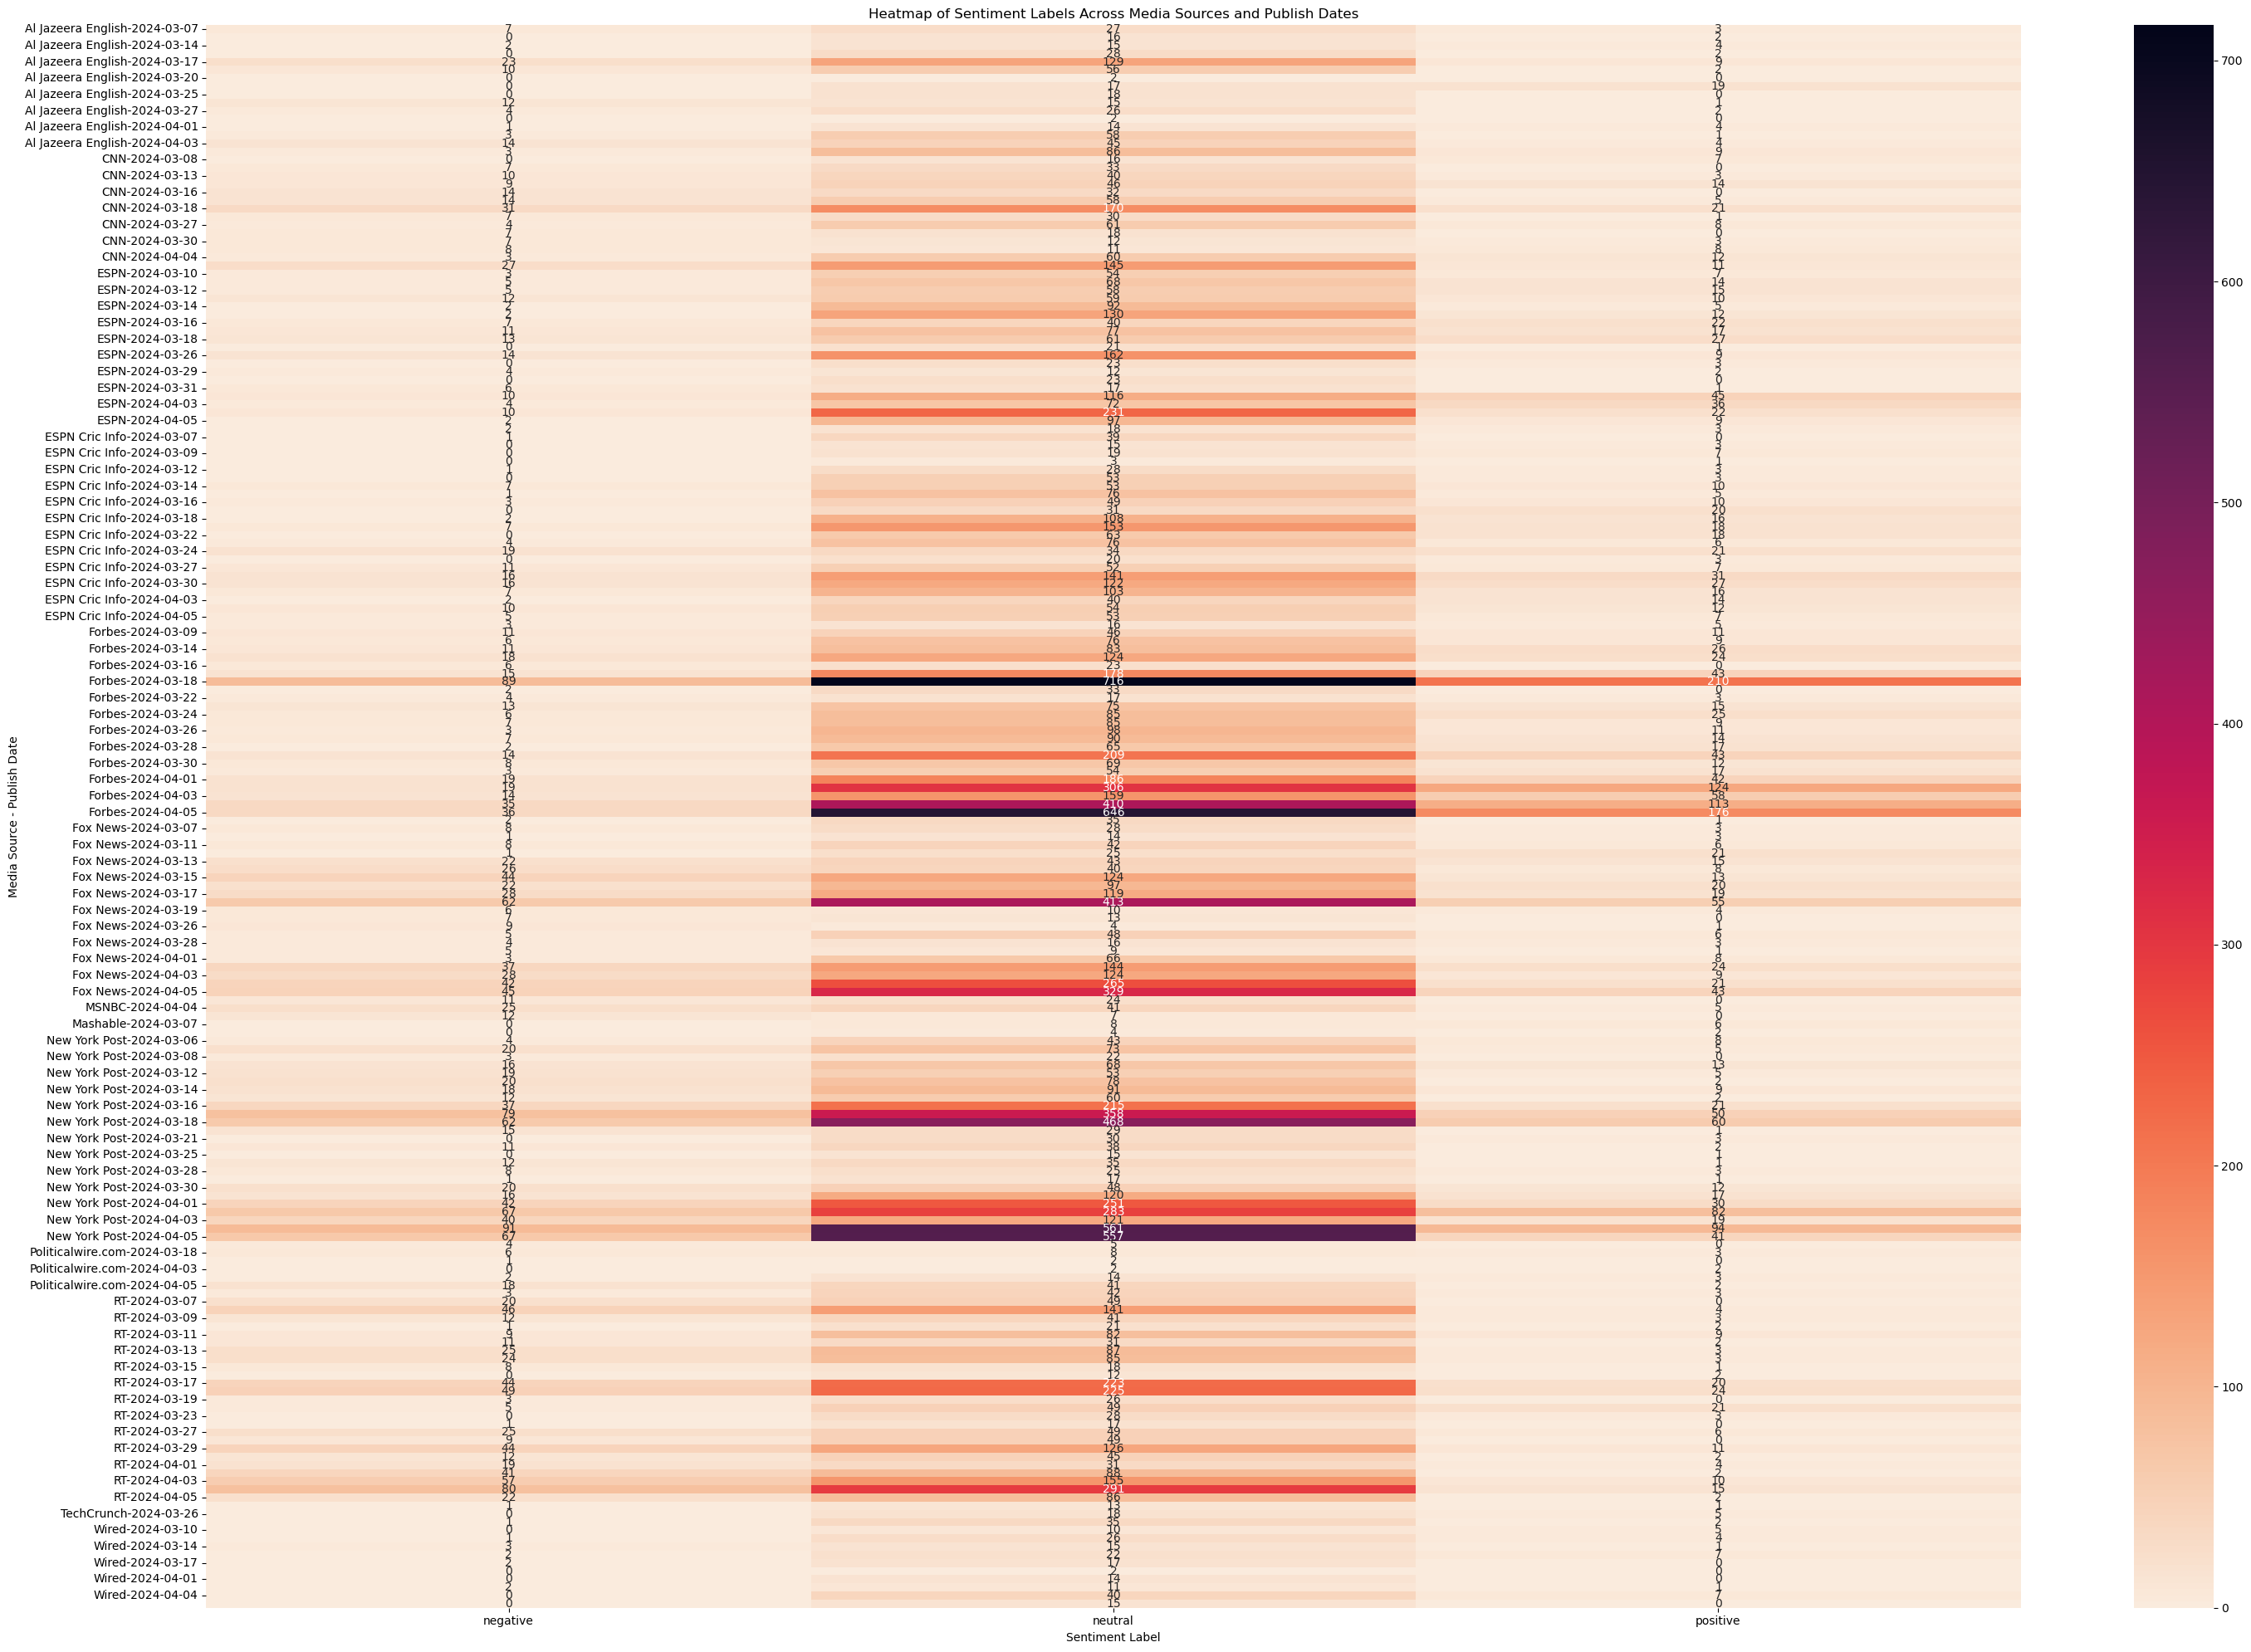

In [10]:
df_exploded = df.explode('labels')
heatmap_data = df_exploded.groupby(['media_source', 'publish_date'])['labels'].value_counts().unstack().fillna(0)

plt.figure(figsize=(30, 20))
sns.heatmap(heatmap_data, cmap='rocket_r', annot=True, fmt=".0f")
plt.title('Heatmap of Sentiment Labels Across Media Sources and Publish Dates')
plt.xlabel('Sentiment Label')
plt.ylabel('Media Source - Publish Date')
plt.tight_layout()
plt.show()

## Top Entities Mentioned in Articles

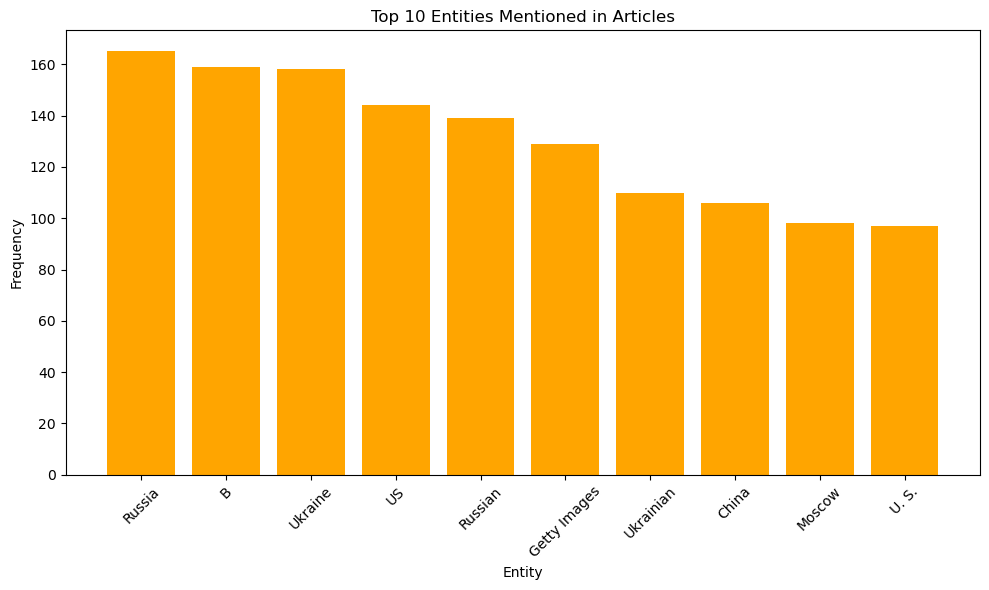

In [11]:
all_words_flat = [word.strip("[]'") for sublist in df['words'] for word in sublist]
word_counts = Counter(all_words_flat)

most_common_words = dict(word_counts.most_common(10))

plt.figure(figsize=(10, 6))
plt.bar(most_common_words.keys(), most_common_words.values(), color='orange')
plt.title('Top 10 Entities Mentioned in Articles')
plt.xlabel('Entity')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Sentiment Scores Over Time

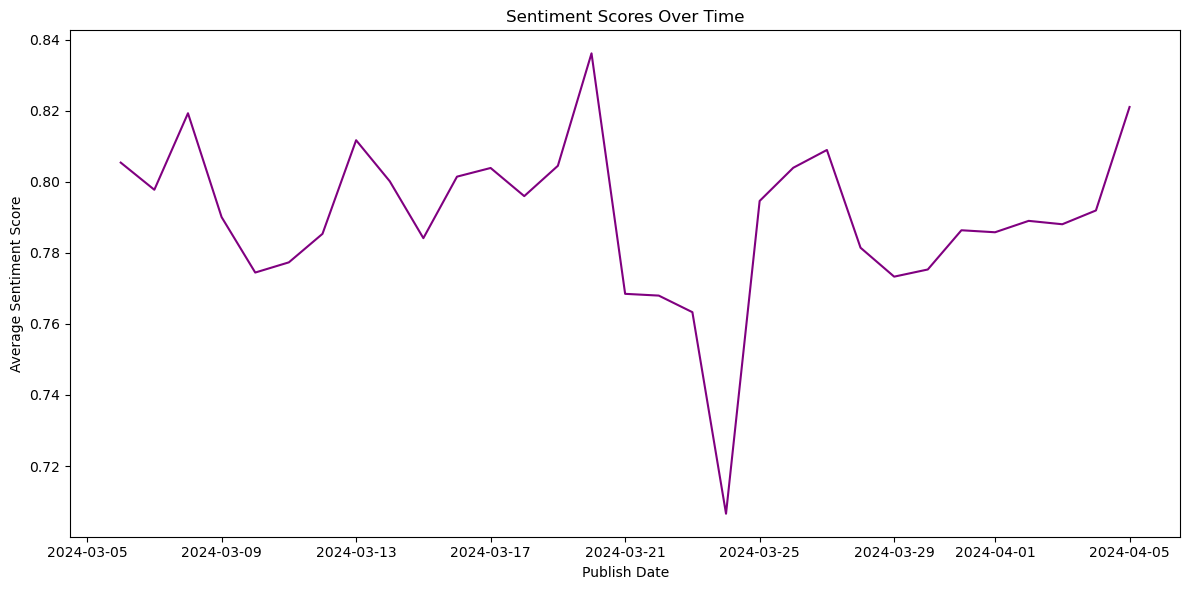

In [12]:
scores_over_time = df.groupby('publish_date')['average_score'].mean()

plt.figure(figsize=(12, 6))
scores_over_time.plot(color='purple')
plt.title('Sentiment Scores Over Time')
plt.xlabel('Publish Date')
plt.ylabel('Average Sentiment Score')
plt.tight_layout()
plt.show()

## Media Source Contribution Over Time

<Figure size 1200x600 with 0 Axes>

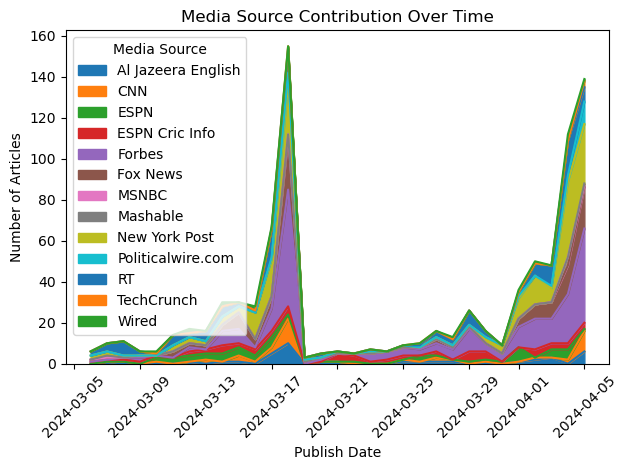

In [13]:
pivot_df = df.pivot_table(index='publish_date', columns='media_source', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 6))
pivot_df.plot.area()
plt.title('Media Source Contribution Over Time')
plt.xlabel('Publish Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.legend(title='Media Source')
plt.tight_layout()
plt.show()

## Sentiment Label Counts

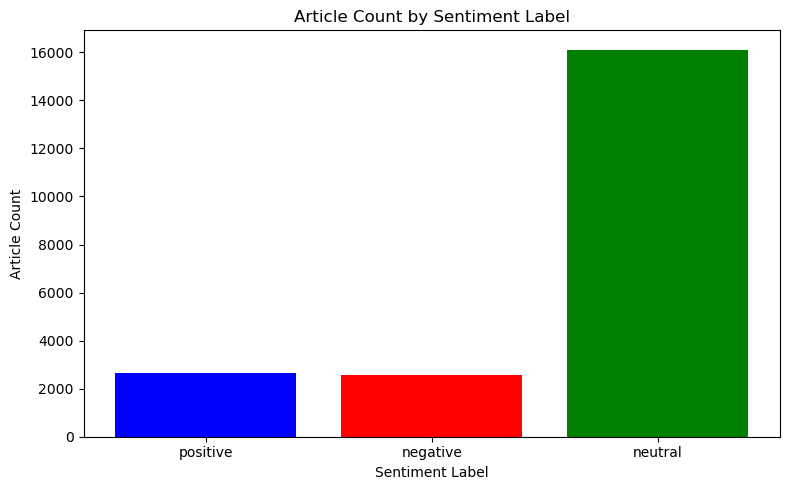

In [14]:
all_labels_flat = [label for sublist in df['labels'] for label in sublist]
label_counts = Counter(all_labels_flat)

plt.figure(figsize=(8, 5))
plt.bar(x=label_counts.keys(), height=label_counts.values(), color=['blue', 'red', 'green'])
plt.title('Article Count by Sentiment Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Article Count')
plt.tight_layout()
plt.show()


## Top words by different media sources

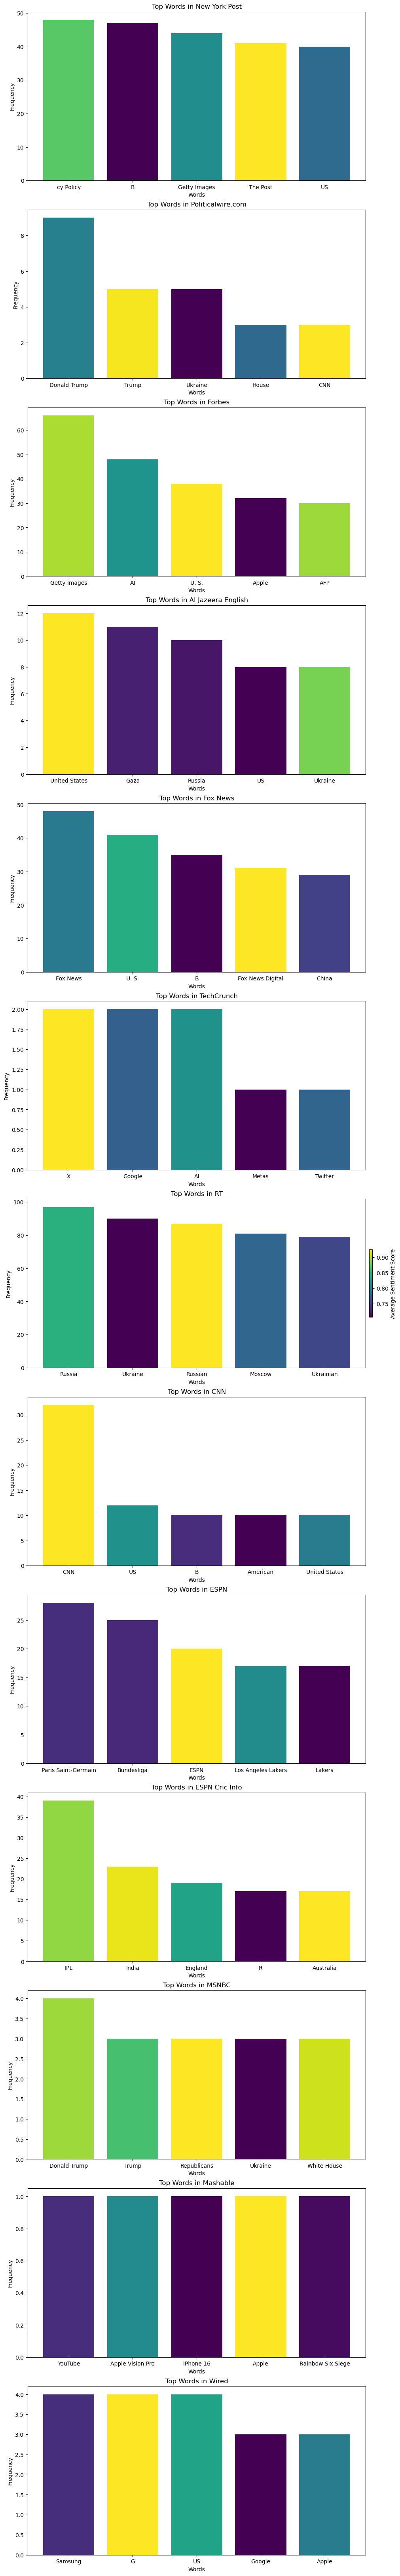

In [15]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

word_info = defaultdict(lambda: defaultdict(lambda: {'count': 0, 'score_sum': 0.0}))

for index, row in df.iterrows():
    media_source = row['media_source']
    for word, score in zip(row['words'], row['scores']):
        word_info[media_source][word]['count'] += 1
        word_info[media_source][word]['score_sum'] += score

top_words_by_source = {}
for source, words in word_info.items():
    top_words = sorted(words.items(), key=lambda x: x[1]['count'], reverse=True)[:5]
    top_words_by_source[source] = {word: info for word, info in top_words}


num_sources = len(top_words_by_source)
fig_height_per_source = 5  
fig_width = 10
fig_height = num_sources * fig_height_per_source

fig, axs = plt.subplots(nrows=num_sources, figsize=(fig_width, fig_height), constrained_layout=True)

if num_sources == 1:
    axs = [axs] 

for ax, (source, words) in zip(axs, top_words_by_source.items()):
    words_sorted = sorted(words.items(), key=lambda x: x[1]['count'], reverse=True)
    words_labels = [word for word, _ in words_sorted]
    word_counts = [info['count'] for _, info in words_sorted]
    word_scores = [info['score_sum'] / info['count'] for _, info in words_sorted]

    norm = Normalize(vmin=min(word_scores), vmax=max(word_scores))
    sm = ScalarMappable(norm=norm, cmap='viridis')
    colors = sm.to_rgba(word_scores)

    ax.bar(words_labels, word_counts, color=colors)
    ax.set_title(f'Top Words in {source}')
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Words')

cbar = fig.colorbar(sm, ax=axs, orientation='vertical', fraction=0.01, pad=0.01)
cbar.set_label('Average Sentiment Score')

plt.show()


## Heatmap of Word Frequencies Across Media Sources

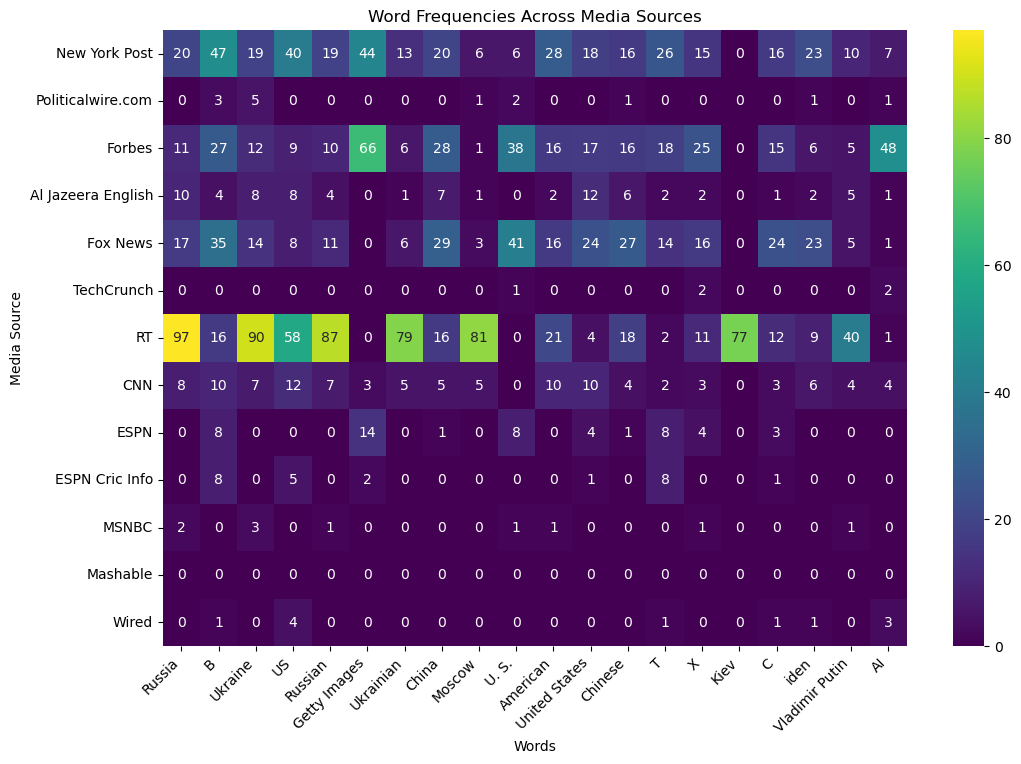

In [16]:
word_counts_by_source = defaultdict(lambda: defaultdict(int))

for _, row in df.iterrows():
    source = row['media_source']
    for word in set(row['words']): 
        word_counts_by_source[source][word] += 1

word_freq_by_source = pd.DataFrame(word_counts_by_source).fillna(0)

word_freq_by_source = word_freq_by_source.T

top_n_words = word_freq_by_source.sum(axis=0).nlargest(20).index
word_freq_by_source = word_freq_by_source[top_n_words]

word_freq_by_source.head()

plt.figure(figsize=(12, 8))
sns.heatmap(word_freq_by_source, annot=True, cmap='viridis', fmt='g')
plt.title('Word Frequencies Across Media Sources')
plt.xlabel('Words')
plt.ylabel('Media Source')
plt.xticks(rotation=45, ha="right")
plt.show()


## Interactive Timeline of Sentiment Over Time

In [17]:
timeline_data = df.groupby(df['publish_date'])['average_score'].mean().reset_index()

fig = px.line(timeline_data, x='publish_date', y='average_score', title='Average Sentiment Score Over Time', markers=True)
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Average Sentiment Score')
fig.show()


## Network Graph of Words Co-occurrence within Articles by Sentiment

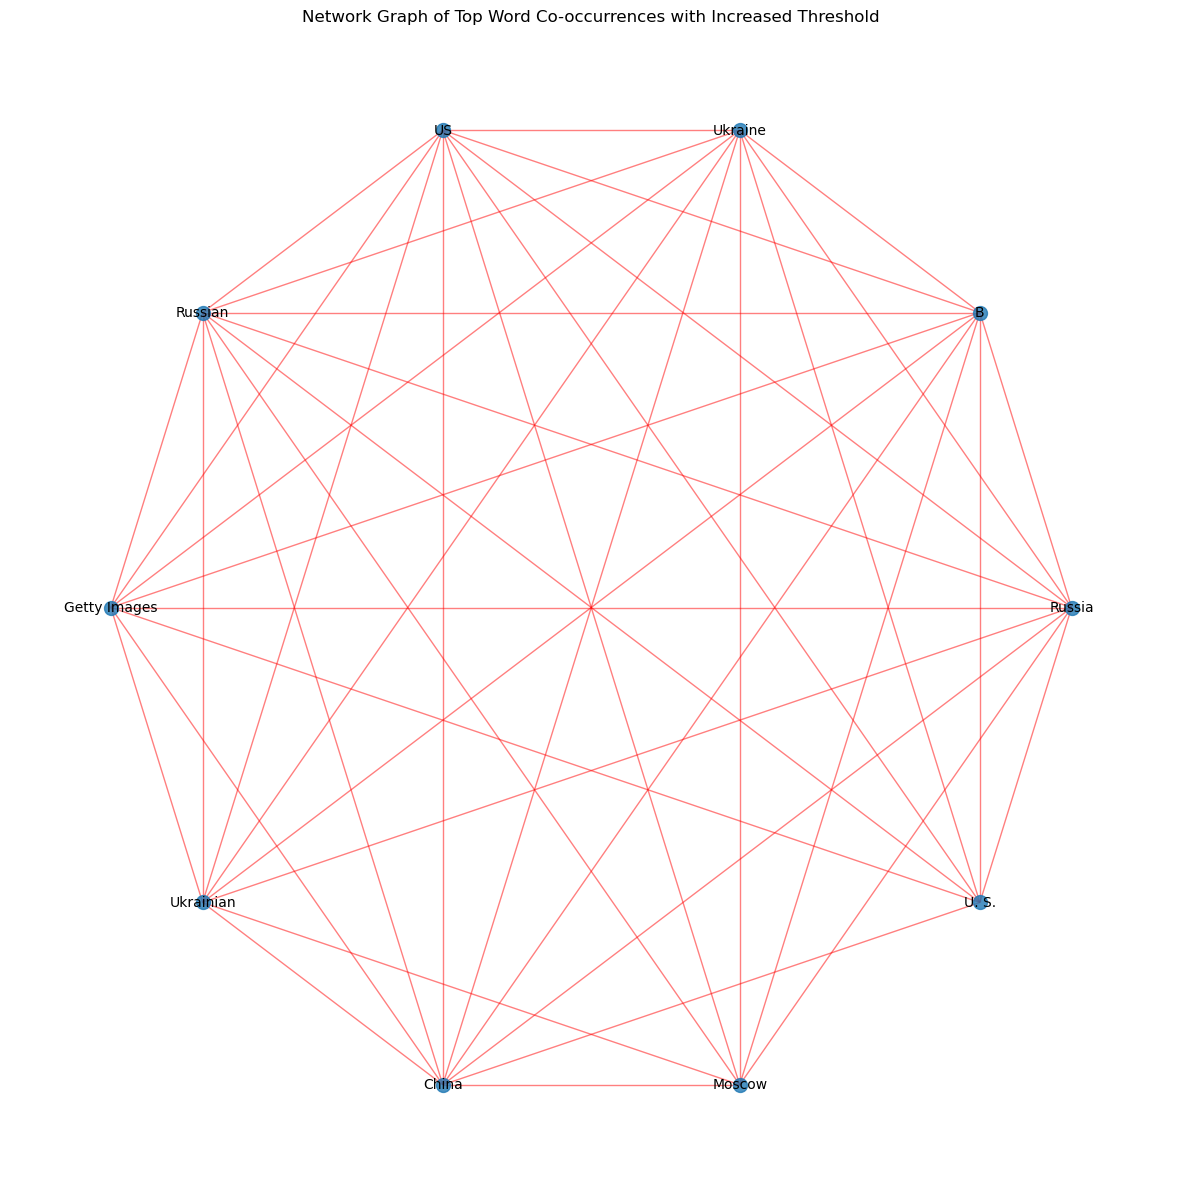

In [19]:
co_occurrence_threshold = 5  
top_n_words = 10  

G = nx.Graph()

top_words = Counter([word for words_list in df['words'] for word in words_list]).most_common(top_n_words)
top_words = [word for word, count in top_words]

G.add_nodes_from(top_words)

for words_list in df['words']:
    words_list = [word for word in words_list if word in top_words]
    for word1, word2 in combinations(words_list, 2):
        if word1 != word2:
            if G.has_edge(word1, word2):
                G[word1][word2]['weight'] += 1
            else:
                G.add_edge(word1, word2, weight=1)

edges_to_remove = [(word1, word2) for word1, word2 in G.edges() if G[word1][word2]['weight'] < co_occurrence_threshold]
G.remove_edges_from(edges_to_remove)

weights = [G[u][v]['weight'] for u, v in G.edges()]
max_weight = max(weights)
min_weight = min(weights)
for u, v in G.edges():
    G[u][v]['weight'] = (G[u][v]['weight'] - min_weight) / (max_weight - min_weight)

plt.figure(figsize=(15, 15))  
pos = nx.kamada_kawai_layout(G)  
nx.draw_networkx_nodes(G, pos, node_size=100, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color="red")
nx.draw_networkx_labels(G, pos, font_size=10)
plt.title("Network Graph of Top Word Co-occurrences with Increased Threshold")
plt.axis('off')
plt.show()
